In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os


transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])


#train_data_path = 'relative path of training data set'
train_data_path = '../horse-or-human/train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False, num_workers=1)  


validation_data_path = '../horse-or-human/validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=1, shuffle=False, num_workers=1)  

In [130]:
def sigmoid(z):
    s = 1 / ( 1 + np.exp(-z))
    
    return s

def initialize_with_zeros(dim):
    
    w = np.zeros((dim, 1))
    b = 0.

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)# compute activation
    A = np.clip(A, 1e-10,1-1e-10)
    cost = -1/m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))                                 # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1/m * np.dot(X, (A-Y).T)
    db = 1/m * np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

# GRADED FUNCTION: predict

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0, i] > 0.5 :
            Y_prediction[0,i] = 1.
        else :
            Y_prediction[0, i] = 0.
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction



# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, X_test,Y_test, num_iterations, learning_rate, print_cost = False):
    costs = []
    costs_test = []
    accuracy_train = []
    accuracy_test = []
    
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
        grads2, cost_test = propagate(w, b, X_test, Y_test)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        Y_prediction_test = predict(w, b, X_test)
        Y_prediction_train = predict(w, b, X)
        
        # Record the costs
        accuracy_train.append(100 - np.mean(np.abs(Y_prediction_train - Y)) * 100)
        accuracy_test.append(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100)
        costs.append(cost)
        costs_test.append(cost_test)
        
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs,costs_test, accuracy_train,accuracy_test



# GRADED FUNCTION: model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs, costs_test, accuracy_train,accuracy_test = optimize(w, b, X_train, Y_train,X_test,Y_test, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "costs_test": costs_test,
         "Y_prediction_test": accuracy_test, 
         "Y_prediction_train" : accuracy_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [98]:
train_x = []
train_y = []
test_x = []
test_y = []
for i, data in enumerate(trainloader):
    # inputs is the image
    # labels is the class of the image
    
    
    inputs, labels = data
    #change tensor to numpy array
    train_y.append(labels.numpy()[0])
    train_x.append(torch.reshape(inputs, (10000,1)).numpy())
    


# load validation images of the batch size for every iteration
for i, data in enumerate(valloader):
    # inputs is the image
    # labels is the class of the image
    inputs, labels = data
    #change tensor to numpy array
    test_y.append(labels.numpy()[0])
    test_x.append(torch.reshape(inputs, (10000,)).numpy())
    



In [101]:
def listToNP(v_list):
    return np.squeeze(np.asarray(v_list))

#list that contains numpy array convert to numpy array 
train_x = np.transpose(listToNP(train_x))
train_y = listToNP(train_y).reshape((1,1027))
test_x = np.transpose(listToNP(test_x))
test_y = listToNP(test_y).reshape((1,256))

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(10000, 1027)
(1, 1027)
(10000, 256)
(1, 256)


In [131]:
d = model(train_x, train_y, test_x, test_y, num_iterations = 100, learning_rate = 0.001, print_cost = True)

train accuracy: 73.80720545277507 %
test accuracy: 87.5 %


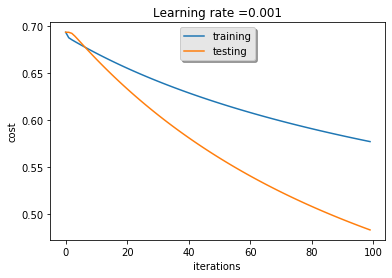

In [133]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
costs_test = np.squeeze(d['costs_test'])
plt.plot(costs, label= 'training')
plt.plot(costs_test, label= 'testing')
plt.ylabel('cost')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

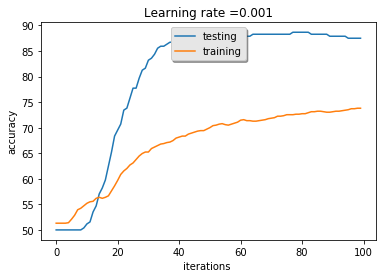

In [134]:
accuracy_test = np.squeeze(d['Y_prediction_test'])
accuracy_train = np.squeeze(d['Y_prediction_train'])
plt.plot(accuracy_test, label= 'testing')
plt.plot(accuracy_train, label= 'training')
plt.ylabel('accuracy')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [135]:
d2 = model(train_x, train_y, test_x, test_y, num_iterations = 100, learning_rate = 0.005, print_cost = True)

train accuracy: 61.92794547224927 %
test accuracy: 60.546875 %


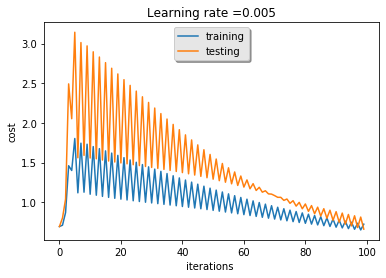

In [138]:
# Plot learning curve (with costs)
costs = np.squeeze(d2['costs'])
costs_test = np.squeeze(d2['costs_test'])
plt.plot(costs, label= 'training')
plt.plot(costs_test, label= 'testing')
plt.ylabel('cost')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d2["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

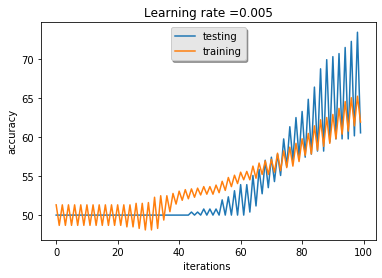

In [137]:
accuracy_test = np.squeeze(d2['Y_prediction_test'])
accuracy_train = np.squeeze(d2['Y_prediction_train'])
plt.plot(accuracy_test, label= 'testing')
plt.plot(accuracy_train, label= 'training')
plt.ylabel('accuracy')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d2["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [139]:
d3 = model(train_x, train_y, test_x, test_y, num_iterations = 100, learning_rate = 0.002, print_cost = True)

train accuracy: 76.43622200584225 %
test accuracy: 87.109375 %


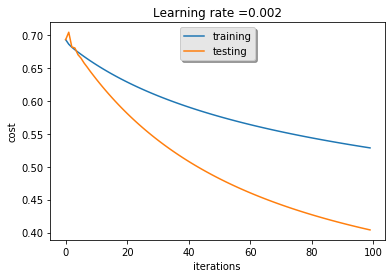

In [140]:
# Plot learning curve (with costs)
costs = np.squeeze(d3['costs'])
costs_test = np.squeeze(d3['costs_test'])
plt.plot(costs, label= 'training')
plt.plot(costs_test, label= 'testing')
plt.ylabel('cost')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d3["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

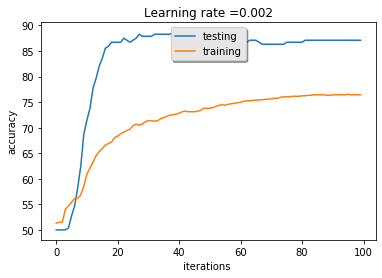

In [141]:
accuracy_test = np.squeeze(d3['Y_prediction_test'])
accuracy_train = np.squeeze(d3['Y_prediction_train'])
plt.plot(accuracy_test, label= 'testing')
plt.plot(accuracy_train, label= 'training')
plt.ylabel('accuracy')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d3["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [142]:
d4 = model(train_x, train_y, test_x, test_y, num_iterations = 100, learning_rate = 0.0001, print_cost = True)

train accuracy: 54.722492697176236 %
test accuracy: 50.390625 %


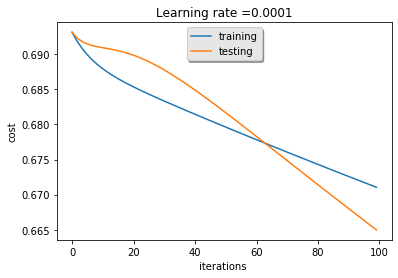

In [143]:
# Plot learning curve (with costs)
costs = np.squeeze(d4['costs'])
costs_test = np.squeeze(d4['costs_test'])
plt.plot(costs, label= 'training')
plt.plot(costs_test, label= 'testing')
plt.ylabel('cost')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d4["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

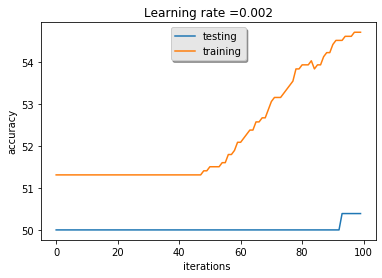

In [144]:
accuracy_test = np.squeeze(d4['Y_prediction_test'])
accuracy_train = np.squeeze(d4['Y_prediction_train'])
plt.plot(accuracy_test, label= 'testing')
plt.plot(accuracy_train, label= 'training')
plt.ylabel('accuracy')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d3["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [145]:
d4 = model(train_x, train_y, test_x, test_y, num_iterations = 500, learning_rate = 0.0001, print_cost = True)

train accuracy: 69.71762414800389 %
test accuracy: 86.71875 %


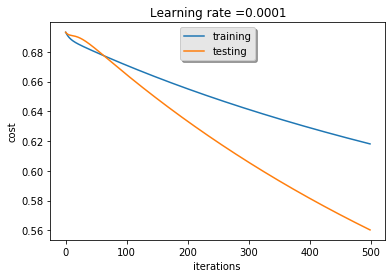

In [146]:
# Plot learning curve (with costs)
costs = np.squeeze(d4['costs'])
costs_test = np.squeeze(d4['costs_test'])
plt.plot(costs, label= 'training')
plt.plot(costs_test, label= 'testing')
plt.ylabel('cost')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d4["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

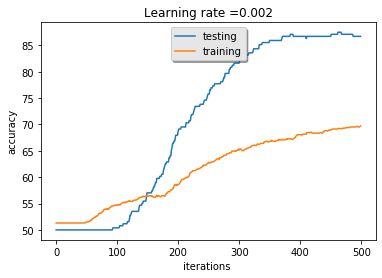

In [147]:
accuracy_test = np.squeeze(d4['Y_prediction_test'])
accuracy_train = np.squeeze(d4['Y_prediction_train'])
plt.plot(accuracy_test, label= 'testing')
plt.plot(accuracy_train, label= 'training')
plt.ylabel('accuracy')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d3["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## best accuracy

| dataset | loss | accuracy | 
|:-------|-------:|:------:|
|   training    |0.57|73.80|
|   validation    |0.48|87.5|

d = model(train_x, train_y, test_x, test_y, num_iterations = 100, learning_rate = 0.001, print_cost = True)

In [149]:
print(d["costs"][-1])

0.5771146865745925


In [150]:
print(d["costs_test"][-1])

0.48340711852757057
